<a href="https://colab.research.google.com/github/Zarina-dev/Xray-Pneumonia-detection/blob/main/import_kaggle_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#  ========== use when says  'Endpoint is not connected ' =================== to remount
# import os
# import sys
# os.execl(sys.executable, sys.executable, *sys.argv)

## Mount , 

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [9]:
import os 
os.environ['KAGGLE_CONFIG_DIR'] = '/content/gdrive/MyDrive/kaggle_dataset'

In [10]:
%cd /content/gdrive/MyDrive/kaggle_dataset

/content/gdrive/MyDrive/kaggle_dataset


In [5]:
!ls

chest-xray-recognition	kaggle.json


In [8]:
%cd chest-xray-recognition
!ls

[Errno 2] No such file or directory: 'chest-xray-recognition'
/content/gdrive/My Drive/kaggle_dataset/chest-xray-recognition
chest_xray  chest-xray-pneumonia.zip


# Download image data from Kaggle

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

 31% 737M/2.29G [00:15<00:34, 48.3MB/s]
User cancelled operation


In [ ]:
!mkdir chest-xray-recognition   # make file

!mv chest-xray-pneumonia.zip chest-xray-recognition  # move downloaded zip file into folder

In [ ]:
%cd chest-xray-recognition/

/content/gdrive/MyDrive/kaggle_dataset/chest-xray-recognition


### Unzip

In [ ]:
!unzip chest-xray-pneumonia.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating: chest_xray/tra

In [11]:
import cv2
from google.colab.patches import cv2_imshow

In [9]:
img = cv2.imread('/content/gdrive/MyDrive/kaggle_dataset/chest-xray-recognition/chest_xray/test/NORMAL/IM-0001-0001.jpeg')
# cv2_imshow(img)


In [10]:
%cd /content/gdrive/MyDrive/kaggle_dataset/chest-xray-recognition/chest_xray/train 
!ls

/content/gdrive/MyDrive/kaggle_dataset/chest-xray-recognition/chest_xray/train
NORMAL	PNEUMONIA  xray_array_data


In [12]:
from tensorflow.keras.utils import img_to_array

IMG_SIZE = 60
PATH_FOLD = r'/content/gdrive/MyDrive/kaggle_dataset/chest-xray-recognition/chest_xray/train'


In [13]:
img_data = []

for i, category in enumerate(os.listdir(path=PATH_FOLD)):
  path_category = os.path.join(PATH_FOLD, category)
 
  for j, img in enumerate(os.listdir(path_category)):
      
      
      imgs = cv2.imread(os.path.join(path_category, img))

      try:
        imgs = cv2.resize(imgs, (IMG_SIZE, IMG_SIZE))
        imgs = cv2.cvtColor(imgs, cv2.COLOR_BGR2GRAY)

      except:
        pass

      imgs = img_to_array(imgs)
      
      img_data.append([imgs, category])
      
      print(f'{i} - {j} done!')
     
      if j == 3870:
        break




0 - 0 done!


KeyboardInterrupt: ignored

In [13]:
import numpy as np
np.array(img_data).shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


(5216, 2)

In [14]:
# using chest_xray > normal data to avoid disbalance 

PATH = f'/content/gdrive/MyDrive/kaggle_dataset/chest-xray-recognition/chest_xray/chest_xray/train/NORMAL'
category = 'NORMAL'
for i, img in enumerate(os.listdir(PATH)):
  imgs = cv2.imread(os.path.join(PATH, img))
  
  try:
    imgs = cv2.resize(imgs, (IMG_SIZE, IMG_SIZE))
    imgs = cv2.cvtColor(imgs,cv2.COLOR_BGR2GRAY)
  except:
    pass

  imgs = img_to_array(imgs)
  img_data.append([imgs, category])
  print(f'normal {i} done!')

  if i==1000:
    break
  

normal 0 done!
normal 1 done!
normal 2 done!
normal 3 done!
normal 4 done!
normal 5 done!
normal 6 done!
normal 7 done!
normal 8 done!
normal 9 done!
normal 10 done!
normal 11 done!
normal 12 done!
normal 13 done!
normal 14 done!
normal 15 done!
normal 16 done!
normal 17 done!
normal 18 done!
normal 19 done!
normal 20 done!
normal 21 done!
normal 22 done!
normal 23 done!
normal 24 done!
normal 25 done!
normal 26 done!
normal 27 done!
normal 28 done!
normal 29 done!
normal 30 done!
normal 31 done!
normal 32 done!
normal 33 done!
normal 34 done!
normal 35 done!
normal 36 done!
normal 37 done!
normal 38 done!
normal 39 done!
normal 40 done!
normal 41 done!
normal 42 done!
normal 43 done!
normal 44 done!
normal 45 done!
normal 46 done!
normal 47 done!
normal 48 done!
normal 49 done!
normal 50 done!
normal 51 done!
normal 52 done!
normal 53 done!
normal 54 done!
normal 55 done!
normal 56 done!
normal 57 done!
normal 58 done!
normal 59 done!
normal 60 done!
normal 61 done!
normal 62 done!
no

In [15]:
np.array(img_data).shape   # norm: 2334   pneumania: 3883

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


(6217, 2)

In [16]:
img_data[:1]

[[array([[[ 88.],
          [ 98.],
          [ 99.],
          ...,
          [ 57.],
          [ 48.],
          [ 56.]],
  
         [[106.],
          [100.],
          [ 98.],
          ...,
          [ 63.],
          [ 58.],
          [122.]],
  
         [[ 59.],
          [108.],
          [105.],
          ...,
          [ 63.],
          [108.],
          [115.]],
  
         ...,
  
         [[  0.],
          [  0.],
          [ 20.],
          ...,
          [ 18.],
          [  0.],
          [  0.]],
  
         [[  0.],
          [  0.],
          [ 21.],
          ...,
          [ 19.],
          [  0.],
          [  0.]],
  
         [[  0.],
          [  0.],
          [ 22.],
          ...,
          [ 19.],
          [  0.],
          [  0.]]], dtype=float32), 'NORMAL']]

In [14]:
import random, matplotlib.pyplot as plt
random.shuffle(img_data)

In [18]:
categs = []
for img in img_data:
  categs.append(img[1])

In [19]:
print(categs)

['PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'NORMAL', 'NORMAL', 'PNEUMONIA', 'NORMAL', 'NORMAL', 'NORMAL', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'NORMAL', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'NORMAL', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNE

## Pickle img data in array ( готовый)

In [20]:
import pickle 

with open('xray_array_data', 'wb') as f:
  pickle.dump(img_data, f)
  f.close()

In [21]:
###  DATA IS: /content/gdrive/MyDrive/kaggle_dataset/chest-xray-recognition/chest_xray/train/xray_array_data

## PART 2. Load pickled data

In [24]:
import pickle, numpy as np, matplotlib.pyplot as plt  

In [17]:

with open('/content/gdrive/MyDrive/kaggle_dataset/chest-xray-recognition/chest_xray/train/xray_array_data', 'rb') as f:
  xray_arr_data = pickle.load(f)
  f.close()

In [18]:
print('index 7',xray_arr_data[7][1])
print('index 9',xray_arr_data[9][1])

print('index 1: ',xray_arr_data[1][1])
print('index 2: ',xray_arr_data[2][1])

index 7 NORMAL
index 9 NORMAL
index 1:  PNEUMONIA
index 2:  PNEUMONIA


(60, 60, 1)


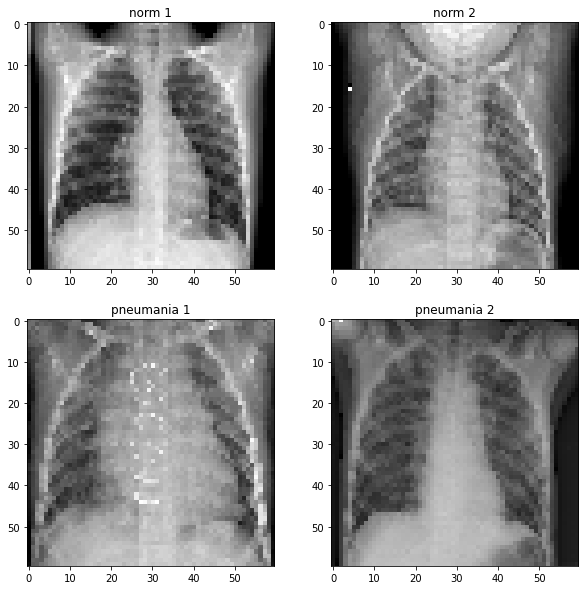

In [19]:
norm_img = xray_arr_data[7][0]
norm_img2 = xray_arr_data[9][0]

pneum_img = xray_arr_data[1][0]
pneum_img2 = xray_arr_data[2][0]

print(norm_img.shape)

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title('norm 1')
plt.imshow(norm_img.reshape(60,60), cmap = 'gray')
plt.subplot(2,2,2)
plt.title('norm 2')
plt.imshow(norm_img2.reshape(60,60), cmap = 'gray')
plt.subplot(2,2,3)
plt.title('pneumania 1')
plt.imshow(pneum_img.reshape(60,60), cmap = 'gray')
plt.subplot(2,2,4)
plt.title('pneumania 2')
plt.imshow(pneum_img2.reshape(60,60), cmap = 'gray')
plt.show()

## Preprocessing (Normalizing , y Mapping )

In [38]:
X = []
y_label = []


for img in xray_arr_data:
  X.append(img[0])
  y_label.append(img[1])


# Mapping y : Normal = 0, Pneumonia = 1

y = y_label.copy()


y = [0 if y=='NORMAL' else 1  for y in y]


# convert to numpy array

X = np.array(X)
y = np.array(y)

In [39]:
print('y_label: ',y_label[:10])
print('y:     ',y[:10])


y_label:  ['PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'NORMAL']
y:      [1 1 1 1 1 1 1 0 1 0]


In [40]:
print('X shape :',X.shape)
print('y shape :',y.shape)


X shape : (6217, 60, 60, 1)
y shape : (6217,)


In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, random_state = 2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((4973, 60, 60, 1), (1244, 60, 60, 1), (4973,), (1244,))

## Artif Neural Network Building

In [47]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,AveragePooling2D, Flatten, Dropout


In [48]:
# !!!!!!!!!!! Try make FLATTEN FUNC FOR YOURSELF --> reshape (60, 60)--> 3600

In [69]:
# conv is expecting 4D (600,28,28)


# conv  padding, kernel size, input size
# max2d  pool size, stride padding 

# conv padding, kernel size
# max2d pool size, stride

# Flatten

# Dense in, hidden, out

model = Sequential([
      Conv2D(32, input_shape = X_train.shape[1:], kernel_size=(3,3), padding='SAME', activation=tf.nn.relu),
      AveragePooling2D( pool_size=(2,2), strides=(2,2), padding='SAME'),
      Conv2D(64, input_shape = X_train.shape[1:], kernel_size=(3,3), padding='SAME', activation=tf.nn.relu),
      AveragePooling2D( pool_size=(2,2), strides=(2,2), padding='SAME'),
      Conv2D(32, input_shape = X_train.shape[1:], kernel_size=(3,3), padding='SAME', activation=tf.nn.relu),
      AveragePooling2D( pool_size=(2,2), strides=(2,2), padding='SAME'),
     

      Flatten(),
      Dropout(rate=0.25) ,
# <--1D data, fully connected (affine) -->
      Dense(1024, activation=tf.nn.relu),
      Dense(1, activation=tf.nn.sigmoid),
             

])

model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 60, 60, 32)        320       
                                                                 
 average_pooling2d_4 (Averag  (None, 30, 30, 32)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_11 (Conv2D)          (None, 30, 30, 64)        18496     
                                                                 
 average_pooling2d_5 (Averag  (None, 15, 15, 64)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_12 (Conv2D)          (None, 15, 15, 32)        18464     
                                                                 
 average_pooling2d_6 (Averag  (None, 8, 8, 32)        

## Train

In [70]:
model.compile(loss = 'binary_crossentropy',
              optimizer='adam',
              metrics = ['accuracy'])

In [72]:
History = model.fit(X_train, y_train, batch_size= 32, epochs=5, verbose = 2, validation_split= .1)

Epoch 1/5
140/140 - 22s - loss: 0.1382 - accuracy: 0.9491 - val_loss: 0.1103 - val_accuracy: 0.9538 - 22s/epoch - 160ms/step
Epoch 2/5
140/140 - 22s - loss: 0.1249 - accuracy: 0.9540 - val_loss: 0.1443 - val_accuracy: 0.9357 - 22s/epoch - 160ms/step
Epoch 3/5
140/140 - 22s - loss: 0.1050 - accuracy: 0.9629 - val_loss: 0.1639 - val_accuracy: 0.9337 - 22s/epoch - 159ms/step
Epoch 4/5
140/140 - 22s - loss: 0.0857 - accuracy: 0.9683 - val_loss: 0.1284 - val_accuracy: 0.9558 - 22s/epoch - 160ms/step
Epoch 5/5
140/140 - 22s - loss: 0.0675 - accuracy: 0.9761 - val_loss: 0.0798 - val_accuracy: 0.9739 - 22s/epoch - 159ms/step


### loss & accuracy visualization

In [76]:
History.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

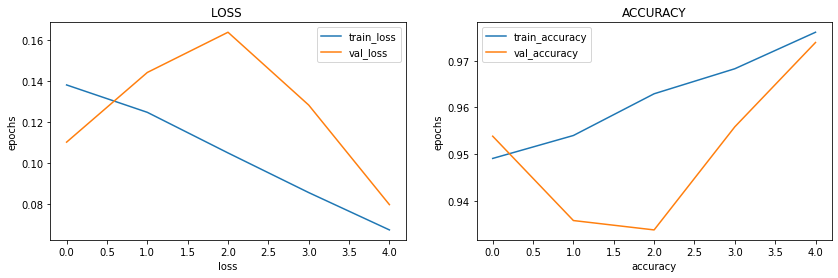

In [80]:
plt.figure(figsize=(14, 4))
plt.subplot(1,2,1)
plt.title('LOSS ')
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.legend(['train_loss','val_loss'])
plt.xlabel('loss')
plt.ylabel('epochs')


plt.subplot(1,2,2)
plt.title('ACCURACY')
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.legend(['train_accuracy','val_accuracy'])
plt.xlabel('accuracy')
plt.ylabel('epochs')
plt.show()

## Model Evaluate

In [83]:
score = model.evaluate(X_test, y_test, verbose=2)
print(f'\n Test loss:{score[0]*100}%   |||  Test accuracy: {score[1]*100}%')

39/39 - 2s - loss: 0.1007 - accuracy: 0.9614 - 2s/epoch - 45ms/step

 Test loss:10.06992906332016%   |||  Test accuracy: 96.14148139953613%


# pickle model (save)

In [84]:
with open('xray_model_96', 'wb') as f:    #   /content/gdrive/MyDrive/kaggle_dataset/xray_model_96
  pickle.dump(model,f)
  f.close()

INFO:tensorflow:Assets written to: ram://9f104724-aebf-4482-a68c-631fb0adbcd3/assets


## PREDICT NEW SAMPLE

In [89]:
# get random images
# predict them


random_sample_img = [7,100,6102,125]

[print(f'{index } : {y[index]}') for index in random_sample_img]


X_for_predict = []
y_sample_real_value = []

for rs in random_sample_img:
  X_for_predict.append(X[rs])
  y_sample_real_value.append(y[rs])

7 : 0
100 : 1
6102 : 1
125 : 0


In [91]:
X_for_predict = np.array(X_for_predict)

print(X_for_predict.shape)

(4, 60, 60, 1)


I am gonna predict X_for_predict datas --> answer should be  ✈ 0 , 1 , 1 , 0 

In [92]:
predicted = model.predict(X_for_predict)
predicted

array([[0.01154178],
       [0.99997246],
       [0.99983585],
       [0.00881898]], dtype=float32)

In [96]:
y_predicted = predicted.round()
y_predicted

array([[0.],
       [1.],
       [1.],
       [0.]], dtype=float32)

## YEP! Check ✅

In [100]:
print(f' y real (should be) : {y_sample_real_value}')
print(f' y predicted        : {np.array(y_predicted).reshape(1,-1)} ')

 y real (should be) : [0, 1, 1, 0]
 y predicted        : [[0. 1. 1. 0.]] 


 0 : NORMAL 
 1 : PNEUMONIA


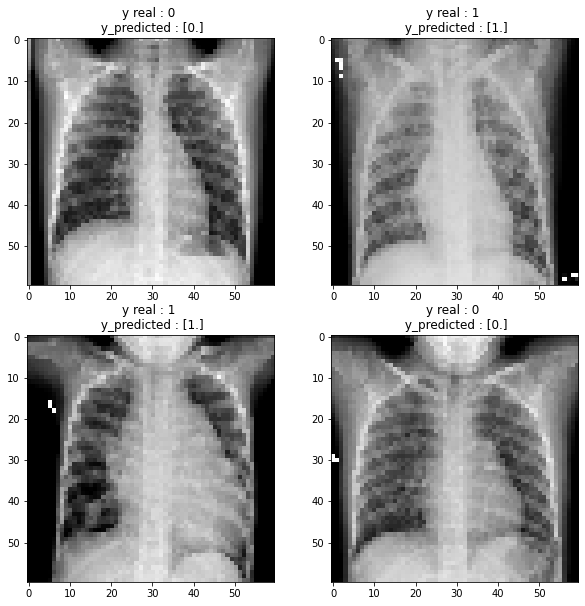

In [113]:

random_sample_img = [7,100,6102,125]

print('=======================================================================')
print(' 0 : NORMAL \n 1 : PNEUMONIA')
print('=======================================================================')

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.title(f'y real : {y_sample_real_value[0]} \n y_predicted : {y_predicted[0]}')
plt.imshow((X[7].reshape(60,60)), cmap = 'gray')

plt.subplot(2,2,2)
plt.title(f'y real : {y_sample_real_value[1]} \n y_predicted : {y_predicted[1]}')
plt.imshow((X[100]).reshape(60,60), cmap = 'gray')

plt.subplot(2,2,3)
plt.title(f'y real : {y_sample_real_value[2]} \n y_predicted : {y_predicted[2]}')
plt.imshow((X[6102]).reshape(60,60), cmap = 'gray')

plt.subplot(2,2,4)
plt.title(f'y real : {y_sample_real_value[3]} \n y_predicted : {y_predicted[3]}')
plt.imshow((X[125]).reshape(60,60), cmap = 'gray')

plt.show()


✅ WELL DONE ✅

STAY HEALTHY  💗

#           TRIALS

#### DROPOUT을 FULL CONNECTED NETWORK (DENSE) 끝에 넣고 있었을때는 예측도가 55%에 불과했으나 그 전인 FLATTEN LAYER 바로 그 다음에 넣었을 때는 97% 나왔다.

# 1.

model = Sequential([

      Conv2D(32, input_shape = X_train.shape[1:], kernel_size=(3,3), padding='SAME', activation=tf.nn.relu),
      MaxPool2D( pool_size=(2,2), strides=(2,2), padding='SAME'),
      Conv2D(64, kernel_size=(3,3), padding='SAME', activation=tf.nn.relu),
      MaxPool2D( pool_size=(2,2), strides=(2,2), padding = 'SAME'),

      Flatten(),

 <--1D data, fully connected (affine) -->
  
      Dense(1024, activation=tf.nn.relu),
      Dense(1, activation=tf.nn.sigmoid),
      Dropout(rate=0.25)         

])


<-- fit accur -->

Epoch 1/3
156/156 - 39s - loss: 6.5612 - accuracy: 0.5715 - 39s/epoch - 248ms/step

Epoch 2/3
156/156 - 39s - loss: 6.7866 - accuracy: 0.5568 - 39s/epoch - 249ms/step

Epoch 3/3
156/156 - 39s - loss: 6.8692 - accuracy: 0.5514 - 39s/epoch - 249ms/step


# 2. 

model = Sequential([

      Conv2D(32, input_shape = X_train.shape[1:], kernel_size=(3,3), padding='SAME', activation=tf.nn.relu),
      AveragePooling2D( pool_size=(2,2), strides=(2,2), padding='SAME'),
     

      Flatten(),

<--1D data, fully connected (affine) -->

      Dense(1024, activation=tf.nn.relu),
      Dense(1, activation=tf.nn.sigmoid),
      Dropout(rate=0.25)         

])

Epoch 1/3
140/140 - 40s - loss: 6.6961 - accuracy: 0.5622 - val_loss: 5.8180 - val_accuracy: 0.6185 - 40s/epoch - 286ms/step 

Epoch 2/3
140/140 - 39s - loss: 6.8095 - accuracy: 0.5553 - val_loss: 5.8180 - val_accuracy: 0.6185 - 39s/epoch - 278ms/step  

Epoch 3/3
140/140 - 39s - loss: 6.6651 - accuracy: 0.5647 - val_loss: 5.8180 - val_accuracy: 0.6185 - 39s/epoch - 278ms/step


# 3


model = Sequential([

      Conv2D(32, input_shape = X_train.shape[1:], kernel_size=(3,3), padding='SAME', activation=tf.nn.relu),
      AveragePooling2D( pool_size=(2,2), strides=(2,2), padding='SAME'),
      Conv2D(64, input_shape = X_train.shape[1:], kernel_size=(3,3), padding='SAME', activation=tf.nn.relu),
      AveragePooling2D( pool_size=(2,2), strides=(2,2), padding='SAME'),
      Conv2D(32, input_shape = X_train.shape[1:], kernel_size=(3,3), padding='SAME', activation=tf.nn.relu),
      AveragePooling2D( pool_size=(2,2), strides=(2,2), padding='SAME'),
     

      Flatten(),
      Dropout(rate=0.25) ,

 <--1D data, fully connected (affine) -->
      
      Dense(1024, activation=tf.nn.relu),
      Dense(1, activation=tf.nn.sigmoid),
             

])


Epoch 1/3
140/140 - 23s - loss: 1.0493 - accuracy: 0.8610 - val_loss: 0.2372 - val_accuracy: 0.8976 - 23s/epoch - 165ms/step 

Epoch 2/3
140/140 - 22s - loss: 0.1971 - accuracy: 0.9260 - val_loss: 0.1809 - val_accuracy: 0.9317 - 22s/epoch - 160ms/step

Epoch 3/3
140/140 - 22s - loss: 0.1695 - accuracy: 0.9339 - val_loss: 0.1414 - val_accuracy: 0.9538 - 22s/epoch - 160ms/step